In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stat
    from sklearn.cluster import KMeans
    from feature_engine.outliers import Winsorizer
    from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
except Exception as e:
    print(e)
else:
    pass

In [2]:
AutoInsurance = pd.read_csv('AutoInsurance.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
AutoInsurance.shape

(9134, 24)

In [5]:
pd.set_option('max_columns',None)

In [6]:
AutoInsurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
AutoInsurance['Customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

In [8]:
#we can drop Customer col

In [9]:
AutoInsurance_copy = AutoInsurance.copy()

In [10]:
AutoInsurance_copy.drop('Customer',axis=1,inplace=True)

In [11]:
AutoInsurance_copy.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
AutoInsurance_copy.isna().any().sum()

0

In [13]:
AutoInsurance_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [14]:
AutoInsurance_copy[AutoInsurance_copy.dtypes[AutoInsurance_copy.dtypes == "object"].index].head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


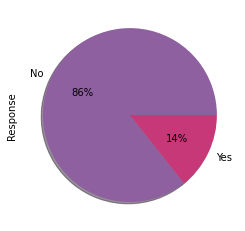

In [15]:
AutoInsurance_copy['Response'].value_counts().plot(
    kind='pie', autopct='%2.0f%%', colors=['#8e609f','#c73879'], shadow=True)
plt.show()

from above we can see that most of the cutomer decided not to response hence this column won't help us in our analysis

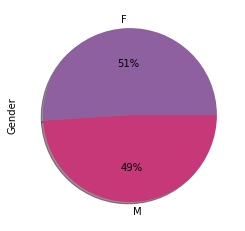

In [16]:
AutoInsurance_copy['Gender'].value_counts().plot(
    kind='pie', autopct='%2.0f%%', colors=['#8e609f','#c73879'], shadow=True)
plt.show()

In [17]:
AutoInsurance_copy.drop('Response',axis=1,inplace=True)

In [18]:
AutoInsurance_copy['Effective To Date'] = pd.to_datetime(AutoInsurance_copy['Effective To Date']) #converting effevtive time dtype

<AxesSubplot:>

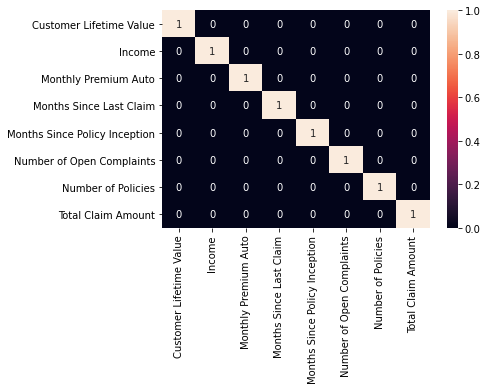

In [19]:
sns.heatmap(AutoInsurance_copy.corr()>0.80, annot=True)

Text(0.5, 1.0, 'Plot')

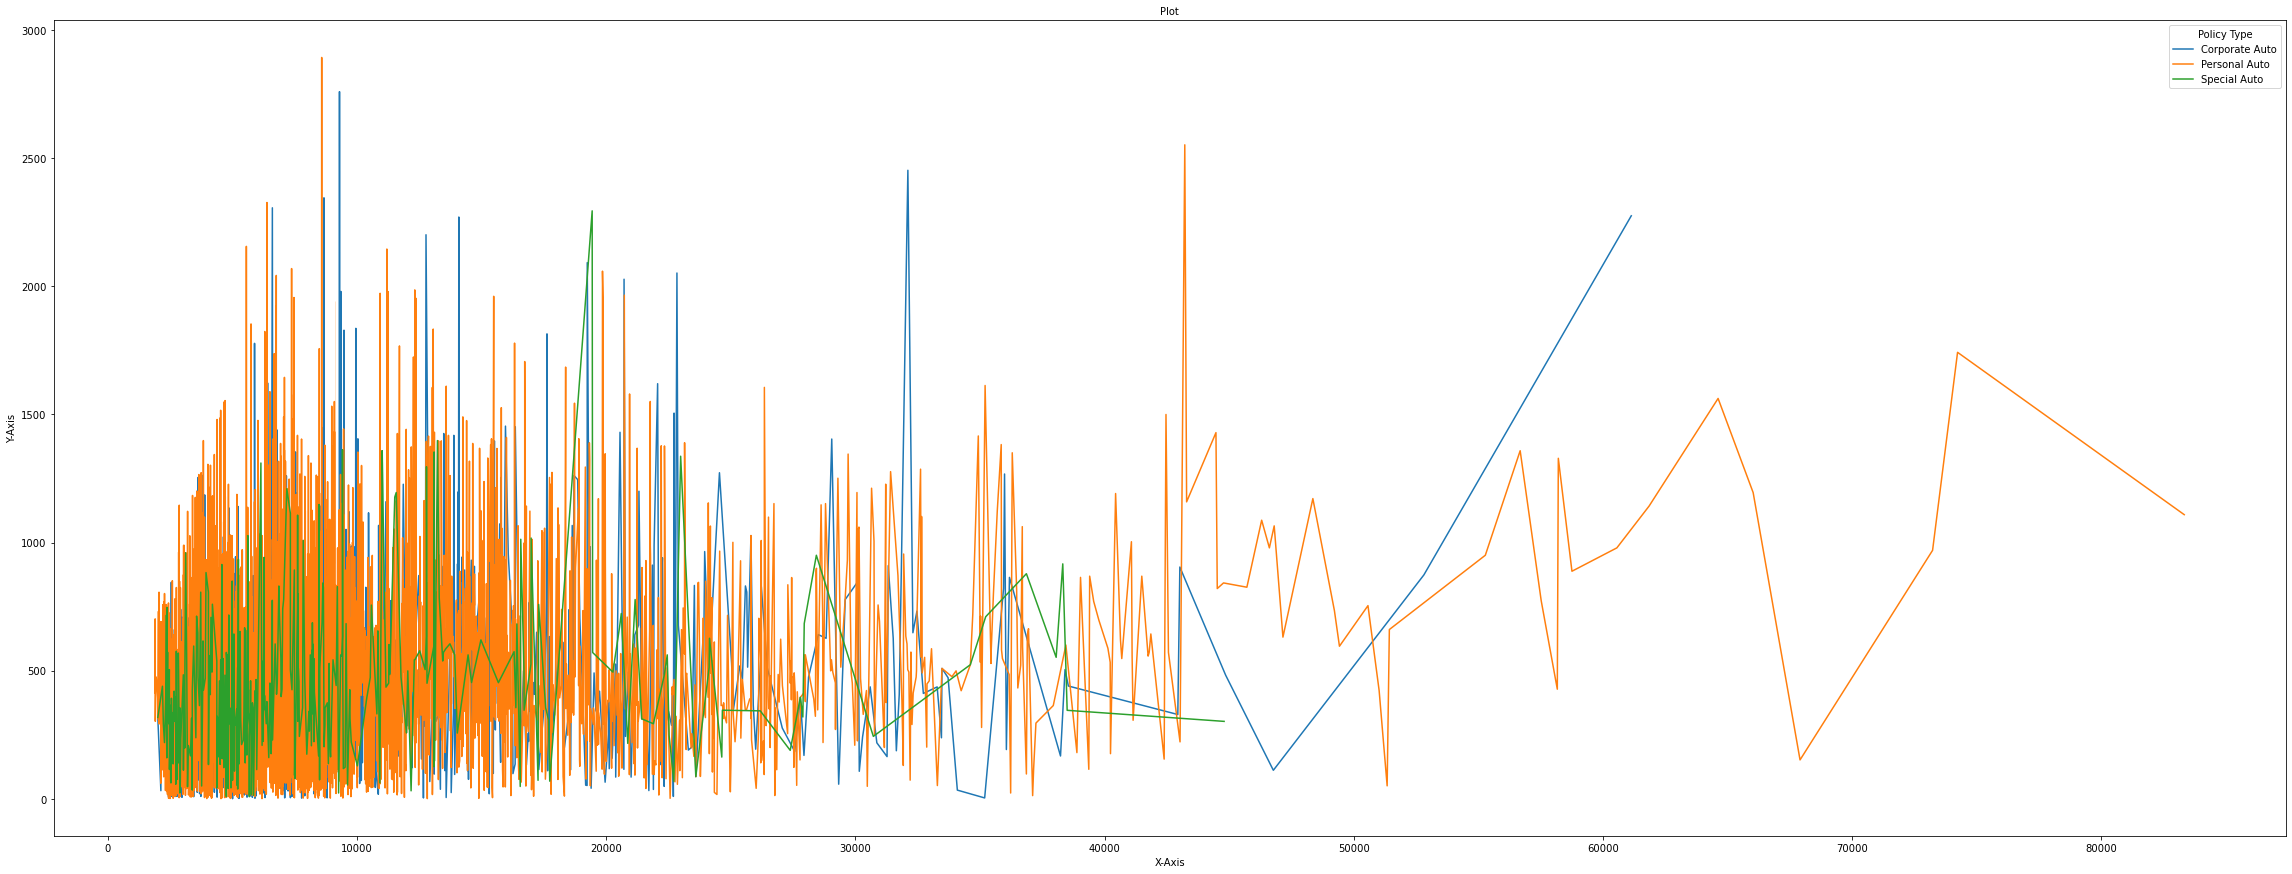

In [20]:
fig, ax = plt.subplots(figsize =(40,15))
ax = sns.lineplot(x= 'Customer Lifetime Value', y='Total Claim Amount',data = AutoInsurance_copy, hue='Policy Type')
ax.set_xlabel("X-Axis", fontsize = 10)
ax.set_ylabel("Y-Axis", fontsize = 10)
ax.set_title("Plot", fontsize = 10)


let's handle catagorical features before further EDA

In [21]:
#lb = LabelEncoder()
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [22]:
#AutoInsurance_copy = AutoInsurance_copy.apply(lambda x: d[x.name].fit_transform(x))

In [23]:
AutoInsurance_copy[AutoInsurance_copy.dtypes[AutoInsurance_copy.dtypes == "object"].index] = AutoInsurance_copy[AutoInsurance_copy.dtypes[AutoInsurance_copy.dtypes == "object"].index].apply(lambda x: d[x.name].fit_transform(x))

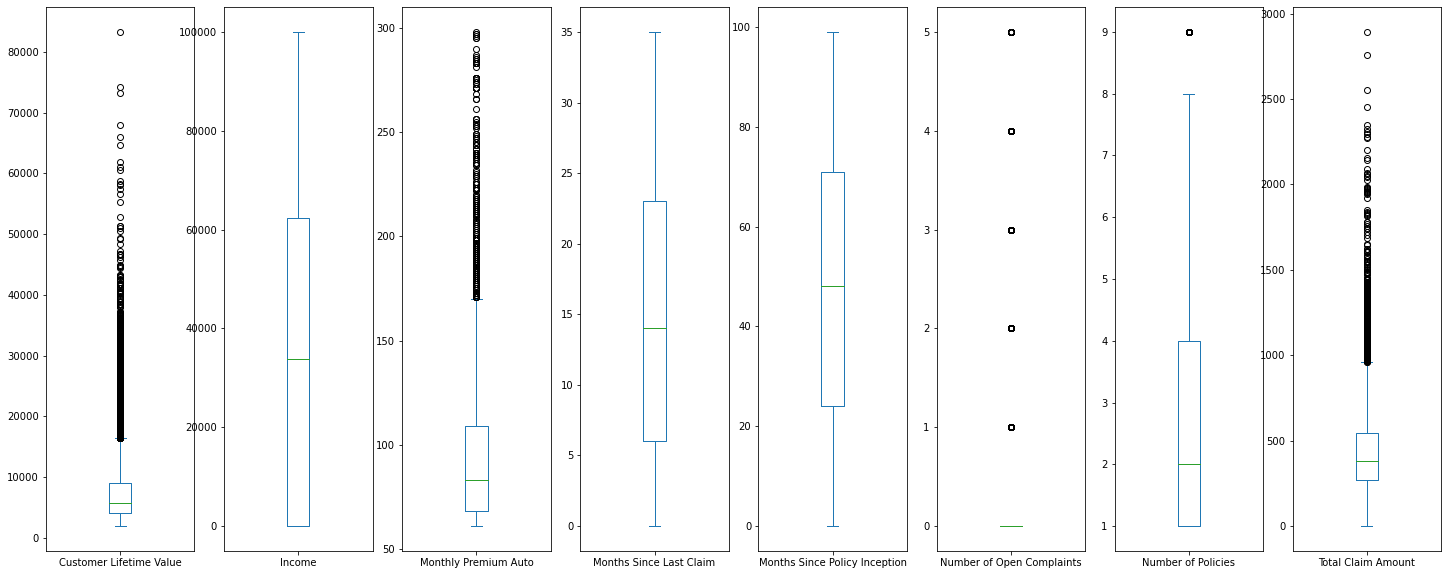

In [30]:
AutoInsurance.plot(kind = 'box', subplots = True, figsize = (25,10))
plt.show()

In [31]:
#now we need to deal outliers becuase clustering techniques sensible to outliers
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr',
                        tail='right',
                        fold=1.5,
                        variables=[
                            'Customer Lifetime Value', 'Monthly Premium Auto',
                            'Total Claim Amount'
                        ])

In [33]:
AutoInsurance_copy[[
    'Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'
]] = winsorizer.fit_transform(AutoInsurance_copy[[
    'Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'
]])

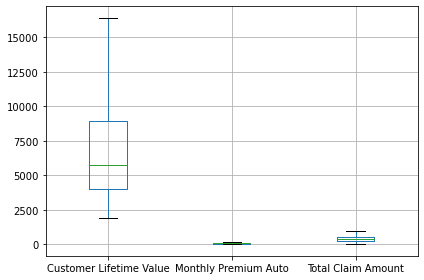

In [40]:
AutoInsurance_copy[[
    'Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'
]].boxplot()
plt.tight_layout()
plt.show()

In [41]:
AutoInsurance.shape

(9134, 24)

In [42]:
AutoInsurance_copy.shape

(9134, 22)

In [43]:
#now we will normalize data before applying clustering
def Normalization(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

In [45]:
AutoInsurance_Normalize = Normalization(AutoInsurance_copy.iloc[:, :])

In [48]:
AutoInsurance_Normalize.drop('Effective To Date', axis=1,inplace=True)

In [49]:
AutoInsurance_copy.drop('Effective To Date', axis=1,inplace=True)

### Standerdization

In [50]:
from sklearn.preprocessing import StandardScaler
AutoInsurance_std = StandardScaler().fit_transform(AutoInsurance_copy)

In [51]:
AutoInsurance_std.shape


(9134, 21)

### MinMax scale

In [53]:
from sklearn.preprocessing import MinMaxScaler
AutoInsurance_minmax = MinMaxScaler().fit_transform(AutoInsurance_copy)


In [54]:
AutoInsurance_minmax.shape

(9134, 21)

### PCA

In [ ]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

In [55]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
AutoInsurance_std_df = pca_std.fit_transform(AutoInsurance_std)

In [59]:
pca_std.singular_values_ #eigen values 

18

In [60]:
# variance containing in each formed PCA

pca_std.explained_variance_ratio_*100

array([11.71720047,  8.9747349 ,  8.90150316,  5.67527031,  5.27431924,
        5.0943486 ,  4.96881023,  4.91778084,  4.84181397,  4.76580697,
        4.70544978,  4.66586422,  4.63566163,  4.52291792,  3.9438309 ,
        3.60545691,  3.47024258,  2.3761746 ])

In [61]:
#cummulative variance ratio
#will give idea of how many num of PCA, the cummulative additon of variance will have much info
cum_var = np.cumsum(pca_std.explained_variance_ratio_*100)

In [63]:
len(cum_var)

18

by applying PCA on standardized data with 95% variance it gives 18 PCA components

In [64]:
pca_MinMax = PCA(random_state=10, n_components=0.95)

In [65]:
AutoInsurance_MinMax_df = pca_MinMax.fit_transform(AutoInsurance_std)

In [66]:
pca_MinMax.singular_values_ #eigen values

array([149.91741363, 131.20517518, 130.66877699, 104.3358184 ,
       100.58271573,  98.85177701,  97.62619352,  97.1235921 ,
        96.37051961,  95.61111331,  95.0037443 ,  94.60328113,
        94.29659592,  93.14284613,  86.97597259,  83.16111546,
        81.58683164,  67.51174383])

In [68]:
#variance in each formed PC
pca_MinMax.explained_variance_ratio_ * 100

array([11.71720047,  8.9747349 ,  8.90150316,  5.67527031,  5.27431924,
        5.0943486 ,  4.96881023,  4.91778084,  4.84181397,  4.76580697,
        4.70544978,  4.66586422,  4.63566163,  4.52291792,  3.9438309 ,
        3.60545691,  3.47024258,  2.3761746 ])

In [70]:
#cummulative variance ratio
#will give idea of how many num of PCA, the cummulative additon of variance will have much info
cum_var_minmax = np.cumsum(pca_std.explained_variance_ratio_*100)

In [71]:
len(cum_var_minmax)

18

by applying PCA on MinMax data with 95% variance it gives 18 PCA components same as standedized mthos so we can choose any of them

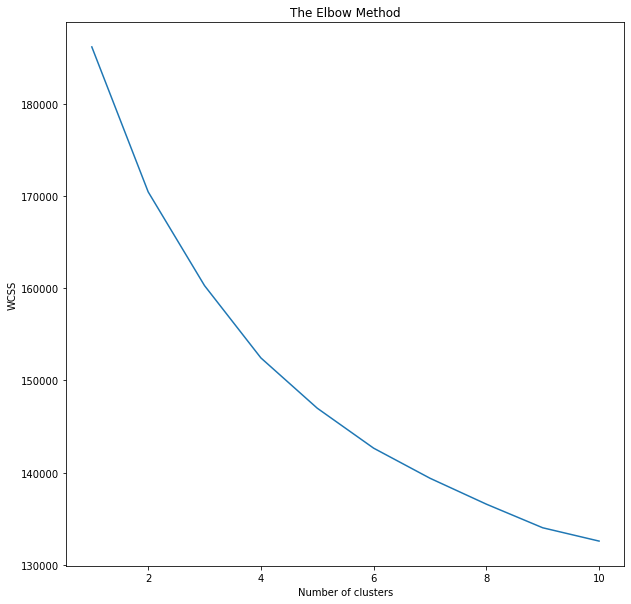

In [72]:
plt.figure(figsize=(10,10))
WCSS = [] #Within cluster sum of squares

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    Kmeans.fit(AutoInsurance_std_df)
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
from yellowbrick.cluster import KElbowVisualizer

In [74]:
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=30)


In [75]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1,
                               k=(2, 10),
                               metric='silhouette',
                               timings=False)
visualizer2 = KElbowVisualizer(model2,
                               k=(2, 10),
                               metric='silhouette',
                               timings=False)

In [80]:
visualizer1.fit(AutoInsurance_std_df)
visualizer1.show()

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [81]:
visualizer2.fit(AutoInsurance_std_df)
visualizer2.show()

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [83]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(AutoInsurance_std_df)
    sil_score1= silhouette_score(AutoInsurance_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.09241943946207055
For n_clusters = 3 The average silhouette_score is : 0.08986784181252984
For n_clusters = 4 The average silhouette_score is : 0.08643167798052541
For n_clusters = 5 The average silhouette_score is : 0.07640602039931532
For n_clusters = 6 The average silhouette_score is : 0.071241355128421
For n_clusters = 7 The average silhouette_score is : 0.06925413560132404
For n_clusters = 8 The average silhouette_score is : 0.06540755030643551
For n_clusters = 9 The average silhouette_score is : 0.06805469339580877
For n_clusters = 10 The average silhouette_score is : 0.06177220047892195


In [84]:
list1= [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(AutoInsurance_MinMax_df)
    sil_score1= silhouette_score(AutoInsurance_MinMax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.09241943946207055
For n_clusters = 3 The average silhouette_score is : 0.08986784181252984
For n_clusters = 4 The average silhouette_score is : 0.08643167798052541
For n_clusters = 5 The average silhouette_score is : 0.07640602039931532
For n_clusters = 6 The average silhouette_score is : 0.071241355128421
For n_clusters = 7 The average silhouette_score is : 0.06925413560132404
For n_clusters = 8 The average silhouette_score is : 0.06540755030643551
For n_clusters = 9 The average silhouette_score is : 0.06805469339580877
For n_clusters = 10 The average silhouette_score is : 0.06177220047892195


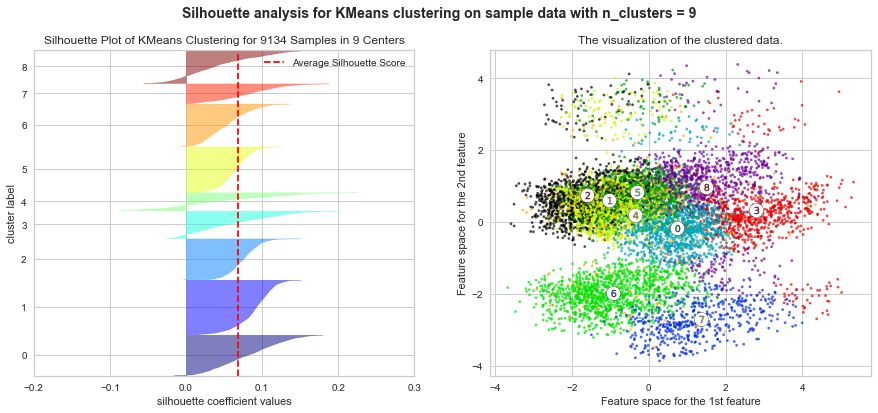

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model2,ax= ax1, colors='jet')
sil_visualizer1.fit(AutoInsurance_MinMax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 9) # 9 is number of clusters
ax2.scatter(AutoInsurance_MinMax_df[:, 0], AutoInsurance_MinMax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model2.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 9),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [98]:
model2_cluster = pd.DataFrame(model2.labels_.copy(), columns=['Kmeans_Clustering'])

In [99]:
model2_cluster

,Kmeans_Clustering
0,6
1,3
2,8
3,7
4,2
...,...
9129,1
9130,6
9131,7
9132,8


In [100]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([AutoInsurance.copy(), model2_cluster], axis=1)
Kmeans_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Kmeans_Clustering
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,6
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,8
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,7
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


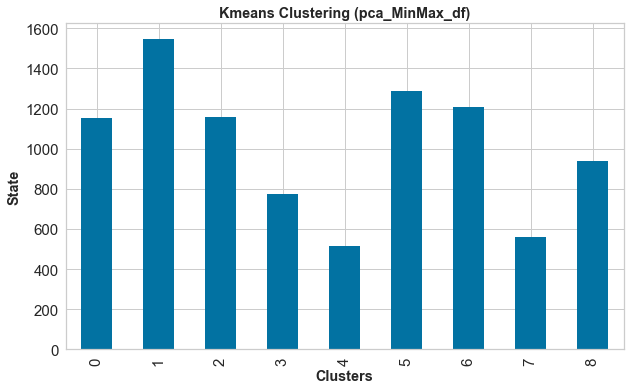

In [143]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['State'].plot(kind='bar')
plt.ylabel('Number of Open Complaints')
plt.title('Kmeans Clustering (pca_MinMax_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [109]:
Kmeans_df[Kmeans_df['Kmeans_Clustering']==1 ]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Kmeans_Clustering
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,1
18,WC83389,Oregon,5710.333115,No,Basic,College,2/27/11,Employed,M,51148,Urban,Married,72,9,1,0,7,Personal Auto,Personal L2,Offer2,Branch,308.981664,Four-Door Car,Medsize,1
21,SV62436,Washington,3041.791561,No,Extended,Bachelor,1/21/11,Disabled,F,13789,Suburban,Divorced,79,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize,1
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
25,FS42516,Oregon,5802.065978,No,Basic,College,1/29/11,Employed,M,97541,Suburban,Married,72,22,1,0,3,Personal Auto,Personal L3,Offer2,Call Center,389.185006,Four-Door Car,Large,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,RY47606,California,3843.965188,No,Extended,Bachelor,1/16/11,Employed,M,43987,Suburban,Married,96,29,17,0,1,Personal Auto,Personal L3,Offer2,Call Center,460.800000,Four-Door Car,Medsize,1
9104,LM97847,California,2615.139220,No,Basic,College,9/1/2011,Employed,M,57023,Urban,Single,67,11,59,0,1,Personal Auto,Personal L2,Offer2,Agent,250.652309,Four-Door Car,Medsize,1
9111,IJ25462,California,2845.520933,No,Basic,Bachelor,7/2/2011,Employed,M,86631,Suburban,Divorced,73,7,44,1,1,Personal Auto,Personal L2,Offer3,Agent,400.832857,Four-Door Car,Small,1
9116,VV68726,California,5133.397765,No,Basic,High School or Below,1/26/11,Disabled,F,28647,Suburban,Divorced,69,11,59,0,3,Personal Auto,Personal L2,Offer1,Agent,331.200000,Four-Door Car,Small,1


<AxesSubplot:xlabel='Kmeans_Clustering', ylabel='Total Claim Amount'>

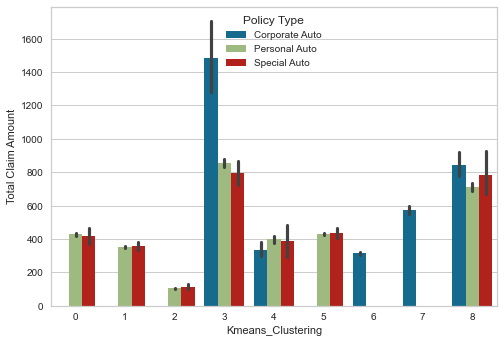

In [140]:
sns.barplot(data=Kmeans_df,x='Kmeans_Clustering',y='Total Claim Amount',hue='Policy Type')

From above plot we can see maximum amount is claimed by clients from cluster 3 and most of them hold corporate auto policy

<AxesSubplot:xlabel='Kmeans_Clustering', ylabel='Number of Open Complaints'>

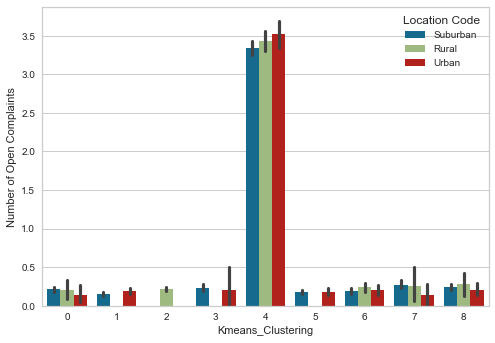

In [147]:
sns.barplot(data=Kmeans_df,x='Kmeans_Clustering',y='Number of Open Complaints',hue='Location Code')

most of the complaints which is open is from cluster 4 so we need to concentrate on them to prevent client churn

<AxesSubplot:xlabel='Kmeans_Clustering', ylabel='Income'>

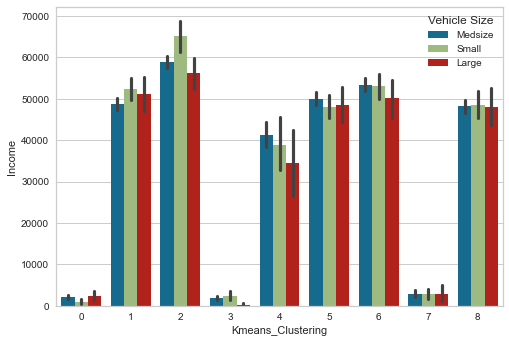

In [151]:
sns.barplot(data=Kmeans_df,x='Kmeans_Clustering',y='Income',hue='Vehicle Size')

<AxesSubplot:xlabel='Kmeans_Clustering', ylabel='Policy'>

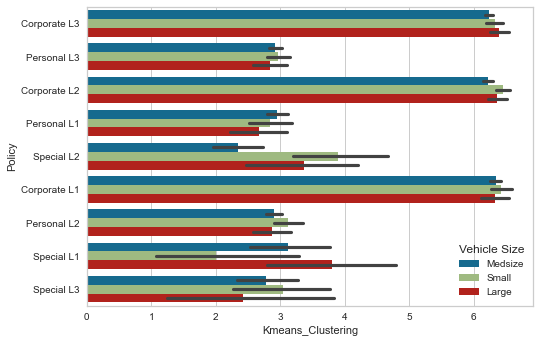

In [152]:
sns.barplot(data=Kmeans_df,x='Kmeans_Clustering',y='Policy',hue='Vehicle Size')